<a href="https://colab.research.google.com/github/satyamgupta56/oil-and-gas-PE/blob/main/Visualization_of_Klinkenberg_effect_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [55]:
# Darcy's law parameters
length_core = 3.0  # Length of the core in cm
area_core = 3.0  # Cross-sectional area of the core in cm²
viscosity = 0.0182  # Viscosity of the fluid in cP

In [56]:
# Example experimental data
flow_rate = np.array([0.348, 1.17, 2.17, 9.73])  # Flow rate in cm³/s
atmospheric_pressure = 0.979  # Atmospheric pressure in atm
P1 = np.array([0.167, 0.501, 0.836, 2.5])  # Inlet pressure in atm


In [57]:
mean_pressure = P1 /2 + atmospheric_pressure  # Mean pressure (dicharge is to the atmosphere)
flow_rate_at_meanP= (flow_rate*atmospheric_pressure)/mean_pressure
print(flow_rate_at_meanP)
reciprocal_mean_pressure = 1 / mean_pressure
print(P1)
print(mean_pressure)


[0.32065129 0.93162261 1.52070866 4.27351727]
[0.167 0.501 0.836 2.5  ]
[1.0625 1.2295 1.397  2.229 ]


In [58]:
# Calculate observed permeability using Darcy's Law: k = (q * mu * L) / (A * ΔP) in md.
observed_permeability = (flow_rate_at_meanP * viscosity * length_core *1000) / (area_core * P1)

print(observed_permeability)

[34.94523086 33.84337628 33.10633689 31.11120574]


In [59]:
# Define linear fit function (equivalent permeability trend)
def linear_fit(x, m, b):
    return m * x + b

# Fit the observed permeability vs reciprocal mean pressure to a linear model
params, covariance = curve_fit(linear_fit, reciprocal_mean_pressure, observed_permeability)

In [60]:
# Extract the slope (m) and intercept (b) from the fit
m, b = params

# Generate a line based on the linear fit for plotting
reciprocal_mean_pressure_fit = np.linspace(min(reciprocal_mean_pressure), max(reciprocal_mean_pressure), 100)
permeability_fit = linear_fit(reciprocal_mean_pressure_fit, m, b)

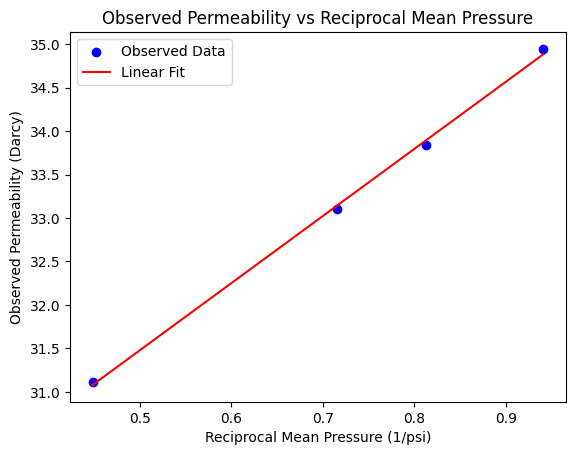

Equivalent Liquid Permeability: 27.6143 Darcy


In [61]:
# Plot the observed data points
plt.scatter(reciprocal_mean_pressure, observed_permeability, label="Observed Data", color="blue")

# Plot the linear fit line
plt.plot(reciprocal_mean_pressure_fit, permeability_fit, label="Linear Fit", color="red")

# Annotating the graph
plt.title("Observed Permeability vs Reciprocal Mean Pressure")
plt.xlabel("Reciprocal Mean Pressure (1/psi)")
plt.ylabel("Observed Permeability (Darcy)")
plt.legend()

# Display the plot
plt.show()

# Equivalent liquid permeability is the y-intercept (b) from the linear fit
equivalent_liquid_permeability = b
print(f"Equivalent Liquid Permeability: {equivalent_liquid_permeability:.4f} Darcy")
